<hr>
<h1>Ego-Facebook dataset</h1>
<hr>

In [2]:
#pip install networkx
#pip install matplotlib
import networkx as nx
import matplotlib.pyplot as plt

G = nx.read_edgelist('facebook_combined.txt', create_using = nx.Graph(), nodetype = int)

<hr>
<h1>Structure of the network</h1>

In [2]:
#number of nodes and edges in the orignal network
print('number of Nodes:',G.number_of_nodes())
print('number of Edges:',G.number_of_edges())

#number of nodes and edges in the network 
#after removing nodes with IDs divisible by 3
G_without_nodes_div_by_3 = G
to_del = [nodeID for nodeID in  G_without_nodes_div_by_3 if (nodeID)%3==0]
G_without_nodes_div_by_3.remove_nodes_from(to_del)
print('number of Nodes after removal of Node IDs divisible by 3:',G_without_nodes_div_by_3.number_of_nodes())
print('number of Edges after removal of Node IDs divisible by 3:',G_without_nodes_div_by_3.number_of_edges())

number of Nodes: 4039
number of Edges: 88234
number of Nodes after removal of Node IDs divisible by 3: 2692
number of Edges after removal of Node IDs divisible by 3: 39116


In [3]:
#nodes with highest degree
highest_degree  =0
for node in G.nodes():
    highest_degree  = max(highest_degree, G.degree[node])

high_degree_nodes = [node for (node, val) in G.degree() if G.degree[node] == highest_degree]
print("node IDs with the highest degree: ",high_degree_nodes)

node IDs with the highest degree:  [107]


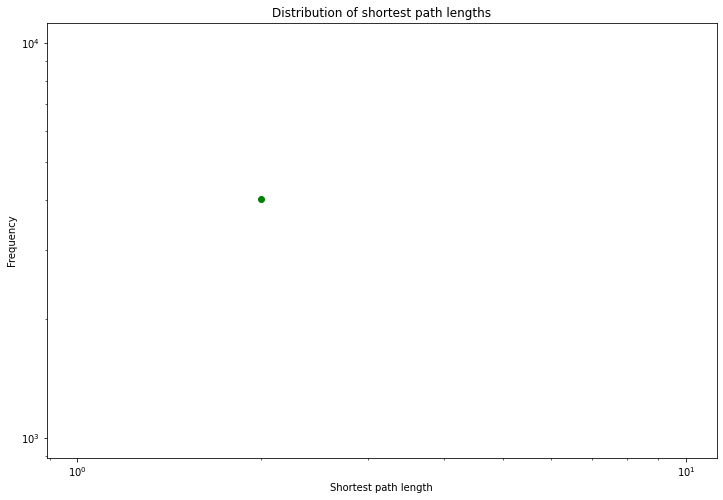

In [5]:
#check
all_paths = [len(c) for c in sorted(nx.shortest_path_length(G), key=len, reverse=True)]
unique_paths = list(set(all_paths))

count_of_paths = []

for i in unique_paths:
    x = all_paths.count(i)
    count_of_paths.append(x)

plt.figure(figsize=(12, 8)) 
plt.loglog(unique_paths, count_of_paths,'go-') 
plt.xlabel('Shortest path length')
plt.ylabel('Frequency')
plt.title('Distribution of shortest path lengths')
plt.savefig('./plots/shortest_path_ego_facebook.jpg')
plt.show()

<hr>
<h1>Components of the network</h1>

In [5]:
components = nx.connected_components(G)
largest_component = max(components, key=len)
subgraph = G.subgraph(largest_component)

#fraction of nodes in the largest connected component
fraction = subgraph.number_of_nodes()/(G.number_of_nodes())
print("fraction of nodes in the largest connected component: ", fraction)

#number of articulation points
articulation_points = len(list(nx.articulation_points(G)))
print("number of articulation points: ", articulation_points)

#number of connected components
print("number of connected components: ",nx.number_connected_components(G))

fraction of nodes in the largest connected component:  0.9684249628528975
number of articulation points:  26
number of connected components:  37


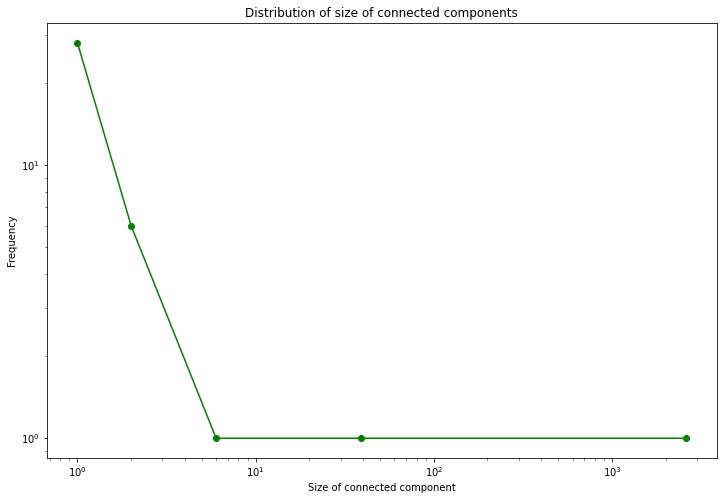

In [6]:
all_sizes = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]
unique_sizes = list(set(all_sizes))

count_of_sizes = []

for i in unique_sizes:
    x = all_sizes.count(i)
    count_of_sizes.append(x)

plt.figure(figsize=(12, 8)) 
plt.loglog(unique_sizes, count_of_sizes,'go-') 
plt.xlabel('Size of connected component')
plt.ylabel('Frequency')
plt.title('Distribution of size of connected components')
plt.savefig('./plots/connected_comp_ego_facebook.jpg')
plt.show()

In [8]:
#diameter of largest component
diameter = nx.diameter(subgraph)
print("network diameter of largest component: ", diameter)

#this takes around 500sec to run

network diameter of largest component:  14
